In [4]:
#%pip install tqdm
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
import statsmodels.api as sm

from cointegration_functions import *
from kalman_functions import *

stocks = pd.read_csv("C:/Users/adamt/OneDrive/Desktop/Jakub/masterThesis/stocks.csv",index_col = 0)

#stocks = pd.read_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/stocks.csv", index_col = 0)
#portfolio = pd.read_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/test_files/select_cointegrated_pairs_test_result.csv",index_col = 0)


stocks_norm = normalize(stocks[:700])
stocks_formation = stocks_norm[:500]
stocks_trading = stocks_norm[501:700]
pairs = calculate_and_sort_ssd(stocks_formation)
portfolio = select_cointegrated_pairs(stocks_formation,pairs)

# Kalman Functions
portfolio_models = estimate_model(stocks_formation=stocks_formation,portfolio=portfolio)


Sorting all combinations by SSD...



Calculating SSDs: 100%|██████████| 126253/126253 [00:13<00:00, 9114.00it/s]


---------------------------------------------------------------------------------------------------- 
Processing pair: AEE - PNW
fitting ols....
OLS p-values:
 AEE    0.0
dtype: float64

 0.0
OLS FIT FOUND....
ADF p value:  0.0555674210806439
non-stationary series!...

 pair count is : 0
---------------------------------------------------------------------------------------------------- 
Processing pair: WEC - XEL
fitting ols....
OLS p-values:
 WEC    0.0
dtype: float64

 0.0
OLS FIT FOUND....
ADF p value:  0.5983094413275676
non-stationary series!...

 pair count is : 0
---------------------------------------------------------------------------------------------------- 
Processing pair: AEP - SO
fitting ols....
OLS p-values:
 AEP    0.0
dtype: float64

 0.0
OLS FIT FOUND....
ADF p value:  0.06589939171296161
non-stationary series!...

 pair count is : 0
---------------------------------------------------------------------------------------------------- 
Processing pair: GOOG - GOOGL
f

In [103]:

x_est, y_obs, R_est, result, trade_counts  = trade_portfolio_kalman(portfolio_models, stocks_trading=stocks_trading, threshold_factor=0.1)

proccesing pair: 
 MTB_PNC 
 ----------------------------------------------------------------------------------------------------
Params A,B,C,D are 0.00023735375234903435 0.9769246051285735 0.006103254027044628 0.0041225500283737825
Current observed spread is:  0.003047725104405766 and Current filtered spread is 0.003047725104405766
---------------------------------------- 
processing date 2017-03-08
Current observed spread is:  0.0014511846015194407 and Current filtered spread is 0.0018765369327435526
Observed spread is too small, long trade entered...
---------------------------------------- 
processing date 2017-03-09
Current observed spread is:  0.0012193217382245576 and Current filtered spread is 0.0014367065506485028
---------------------------------------- 
processing date 2017-03-10
Current observed spread is:  0.00720945194324223 and Current filtered spread is 0.005782503683279047
Long trade was exited...return is : 0.00575826734172279
----------------------------------------

In [104]:
print(result.apply(sum))
print(sum(result.apply(sum)))

MTB_PNC       0.319656
BRK-B_L       0.237638
CLX_KDP       0.439247
GD_GL         0.439755
ALL_BRK-B     0.361666
BAC_CFG       0.426624
GM_TEL        0.568764
BDX_JNJ       0.544326
MMM_OMC       0.541024
EMR_HUBB      0.612312
ALL_HUBB      0.497041
IPG_TRV       0.738951
CL_MDT        0.693055
EMR_ETN       0.509274
BRK-B_HUBB    0.536328
MMM_PG        0.520539
ECL_PFE       0.338239
DOV_EMR       0.421004
CCI_CHD       0.738473
AFL_AMT       0.583762
dtype: float64
10.067678171900408


In [105]:
print(trade_counts.apply(sum))

MTB_PNC       50
BRK-B_L       47
CLX_KDP       50
GD_GL         45
ALL_BRK-B     32
BAC_CFG       48
GM_TEL        38
BDX_JNJ       54
MMM_OMC       27
EMR_HUBB      55
ALL_HUBB      31
IPG_TRV       43
CL_MDT        54
EMR_ETN       51
BRK-B_HUBB    52
MMM_PG        31
ECL_PFE       41
DOV_EMR       39
CCI_CHD       41
AFL_AMT       42
dtype: int64


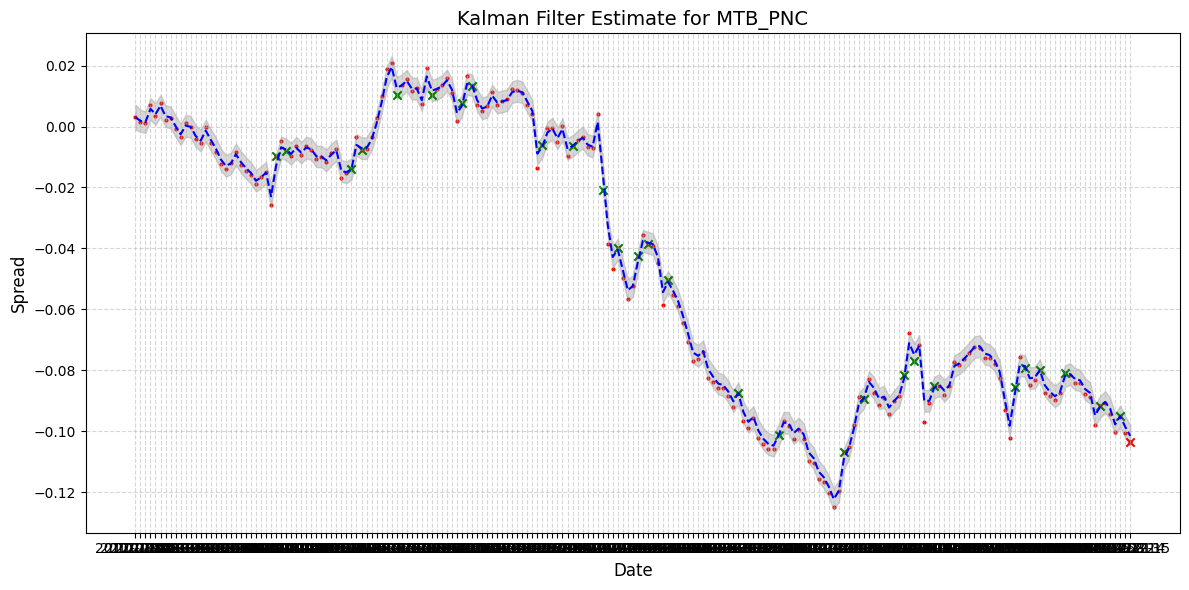

In [75]:
plot_kalman("MTB_PNC", x_est, y_obs, R_est,result)

# Adding transaction costs

In [106]:
#from kalman_functions import *
_, _, _, result_costs, _  = trade_portfolio_kalman(portfolio_models, stocks_trading=stocks_trading, useTransactionCosts=True ,transaction_cost=0.006, threshold_factor=0.1)

proccesing pair: 
 MTB_PNC 
 ----------------------------------------------------------------------------------------------------
Params A,B,C,D are 0.00023735375234903435 0.9769246051285735 0.006103254027044628 0.0041225500283737825
Current observed spread is:  0.003047725104405766 and Current filtered spread is 0.003047725104405766
---------------------------------------- 
processing date 2017-03-08
Current observed spread is:  0.0014511846015194407 and Current filtered spread is 0.0018765369327435526
Observed spread is too small, long trade entered...
---------------------------------------- 
processing date 2017-03-09
Current observed spread is:  0.0012193217382245576 and Current filtered spread is 0.0014367065506485028
---------------------------------------- 
processing date 2017-03-10
Current observed spread is:  0.00720945194324223 and Current filtered spread is 0.005782503683279047
Long trade was exited...return is : 0.00575826734172279
----------------------------------------

In [107]:
print(result_costs.apply(sum))
print(sum(result_costs.apply(sum)))


MTB_PNC       0.019656
BRK-B_L      -0.044362
CLX_KDP       0.139247
GD_GL         0.169755
ALL_BRK-B     0.169666
BAC_CFG       0.138624
GM_TEL        0.340764
BDX_JNJ       0.220326
MMM_OMC       0.379024
EMR_HUBB      0.282312
ALL_HUBB      0.311041
IPG_TRV       0.480951
CL_MDT        0.369055
EMR_ETN       0.203274
BRK-B_HUBB    0.224328
MMM_PG        0.334539
ECL_PFE       0.092239
DOV_EMR       0.187004
CCI_CHD       0.492473
AFL_AMT       0.331762
dtype: float64
4.841678171900407


In [49]:
result_costs - result #should be -0.006 

,MTB_PNC,BRK-B_L,CLX_KDP,GD_GL,ALL_BRK-B,BAC_CFG,GM_TEL,BDX_JNJ,MMM_OMC,EMR_HUBB,ALL_HUBB,IPG_TRV,CL_MDT,EMR_ETN,BRK-B_HUBB,MMM_PG,ECL_PFE,DOV_EMR,CCI_CHD,AFL_AMT
Date,,,,,,,,,,,,,,,,,,,,
2017-03-07,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-03-08,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-03-09,0.000,0.000,-0.006,-0.006,-0.006,0.000,-0.006,-0.006,-0.006,0.000,0.000,-0.006,0.000,0.000,0.000,0.000,-0.006,0.000,0.000,0.000
2017-03-10,-0.006,-0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.006,0.000,-0.006,0.000,-0.006,0.000,0.000,0.000,0.000,-0.006
2017-03-13,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.006,0.000,-0.006,0.000,-0.006,0.000,0.000,0.000,0.000,-0.006,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-11,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.006,0.000,0.000,0.000,0.000,0.000,0.000,-0.006,0.000,0.000,-0.006,0.000,0.000
2017-12-12,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.006,0.000,0.000,0.000,0.000,0.000,-0.006
2017-12-13,-0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.006,0.000,0.000,0.000,0.000,-0.006,0.000,0.000
